In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
air_quality_data = pd.read_csv('air_quality_data.csv',encoding='cp949')

In [6]:
# 날짜 파싱
air_quality_data['일시'] = pd.to_datetime(air_quality_data['일시'])

# 결측치 확인 및 처리
air_quality_data.dropna(inplace=True)

# 구별로 데이터 분리
grouped_data = air_quality_data.groupby('구분')

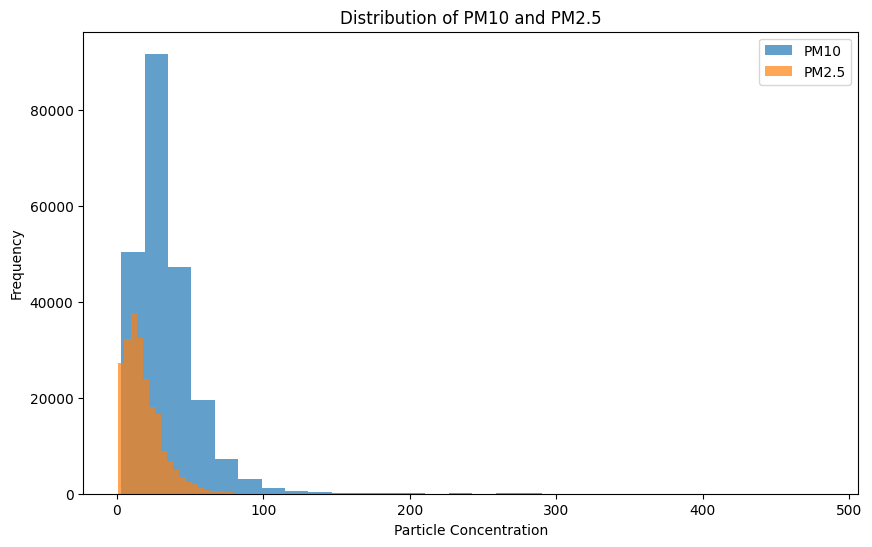

In [8]:

# 미세먼지(PM10) 수치의 전체적인 분포 확인
plt.figure(figsize=(10, 6))
plt.hist(air_quality_data['미세먼지(PM10)'], bins=30, alpha=0.7, label='PM10')
plt.hist(air_quality_data['초미세먼지(PM2.5)'], bins=30, alpha=0.7, label='PM2.5')
plt.title('Distribution of PM10 and PM2.5')
plt.xlabel('Particle Concentration')
plt.ylabel('Frequency')
plt.legend()
plt.show()


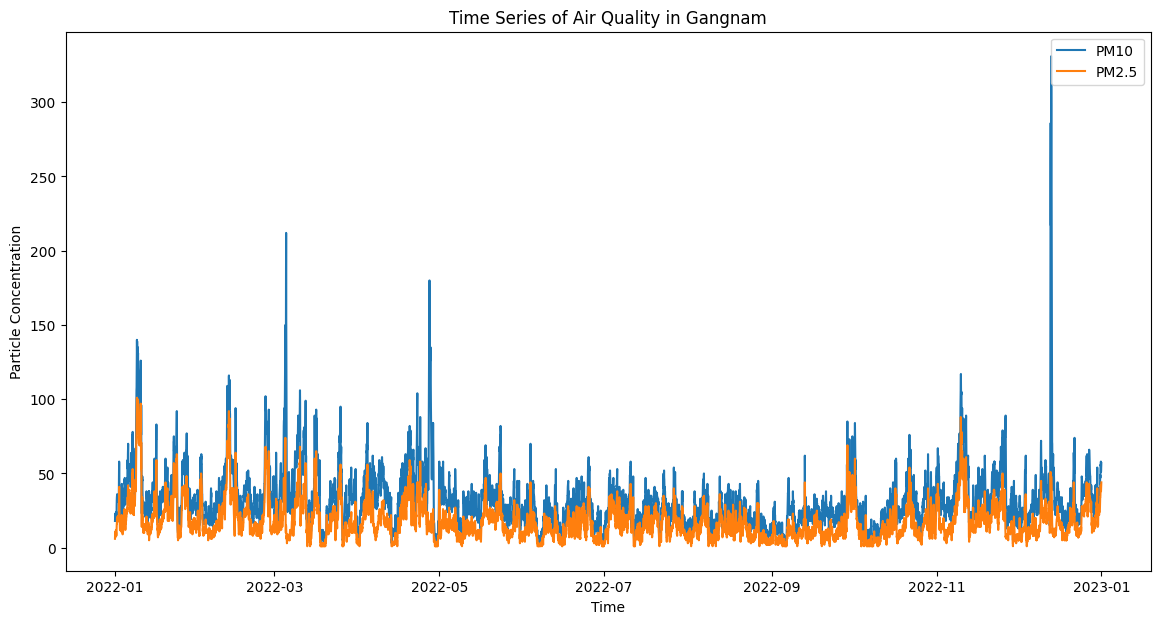

In [9]:
# 강남구의 시계열 데이터 분석
gangnam_data = grouped_data.get_group('강남구')
plt.figure(figsize=(14, 7))
plt.plot(gangnam_data['일시'], gangnam_data['미세먼지(PM10)'], label='PM10')
plt.plot(gangnam_data['일시'], gangnam_data['초미세먼지(PM2.5)'], label='PM2.5')
plt.title('Time Series of Air Quality in Gangnam')
plt.xlabel('Time')
plt.ylabel('Particle Concentration')
plt.legend()
plt.show()


In [11]:
from statsmodels.tsa.arima.model import ARIMA

# 강남구 데이터 준비 (이 부분은 이미 정의된 데이터를 사용한다고 가정)
# gangnam_data = air_quality_data[air_quality_data['구분'] == '강남구']

# ARIMA 모델을 사용한 예측
model = ARIMA(gangnam_data['미세먼지(PM10)'], order=(1, 1, 1))
model_fit = model.fit()

# 모델 요약 출력
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             미세먼지(PM10)   No. Observations:                 8684
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -26586.428
Date:                Mon, 23 Dec 2024   AIC                          53178.857
Time:                        03:28:36   BIC                          53200.064
Sample:                             0   HQIC                         53186.086
                               - 8684                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2049      0.015     13.362      0.000       0.175       0.235
ma.L1          0.0249      0.017      1.491      0.136      -0.008       0.058
sigma2        26.7388      0.134    200.008      0.0